In [1]:
import os
os.chdir("../")

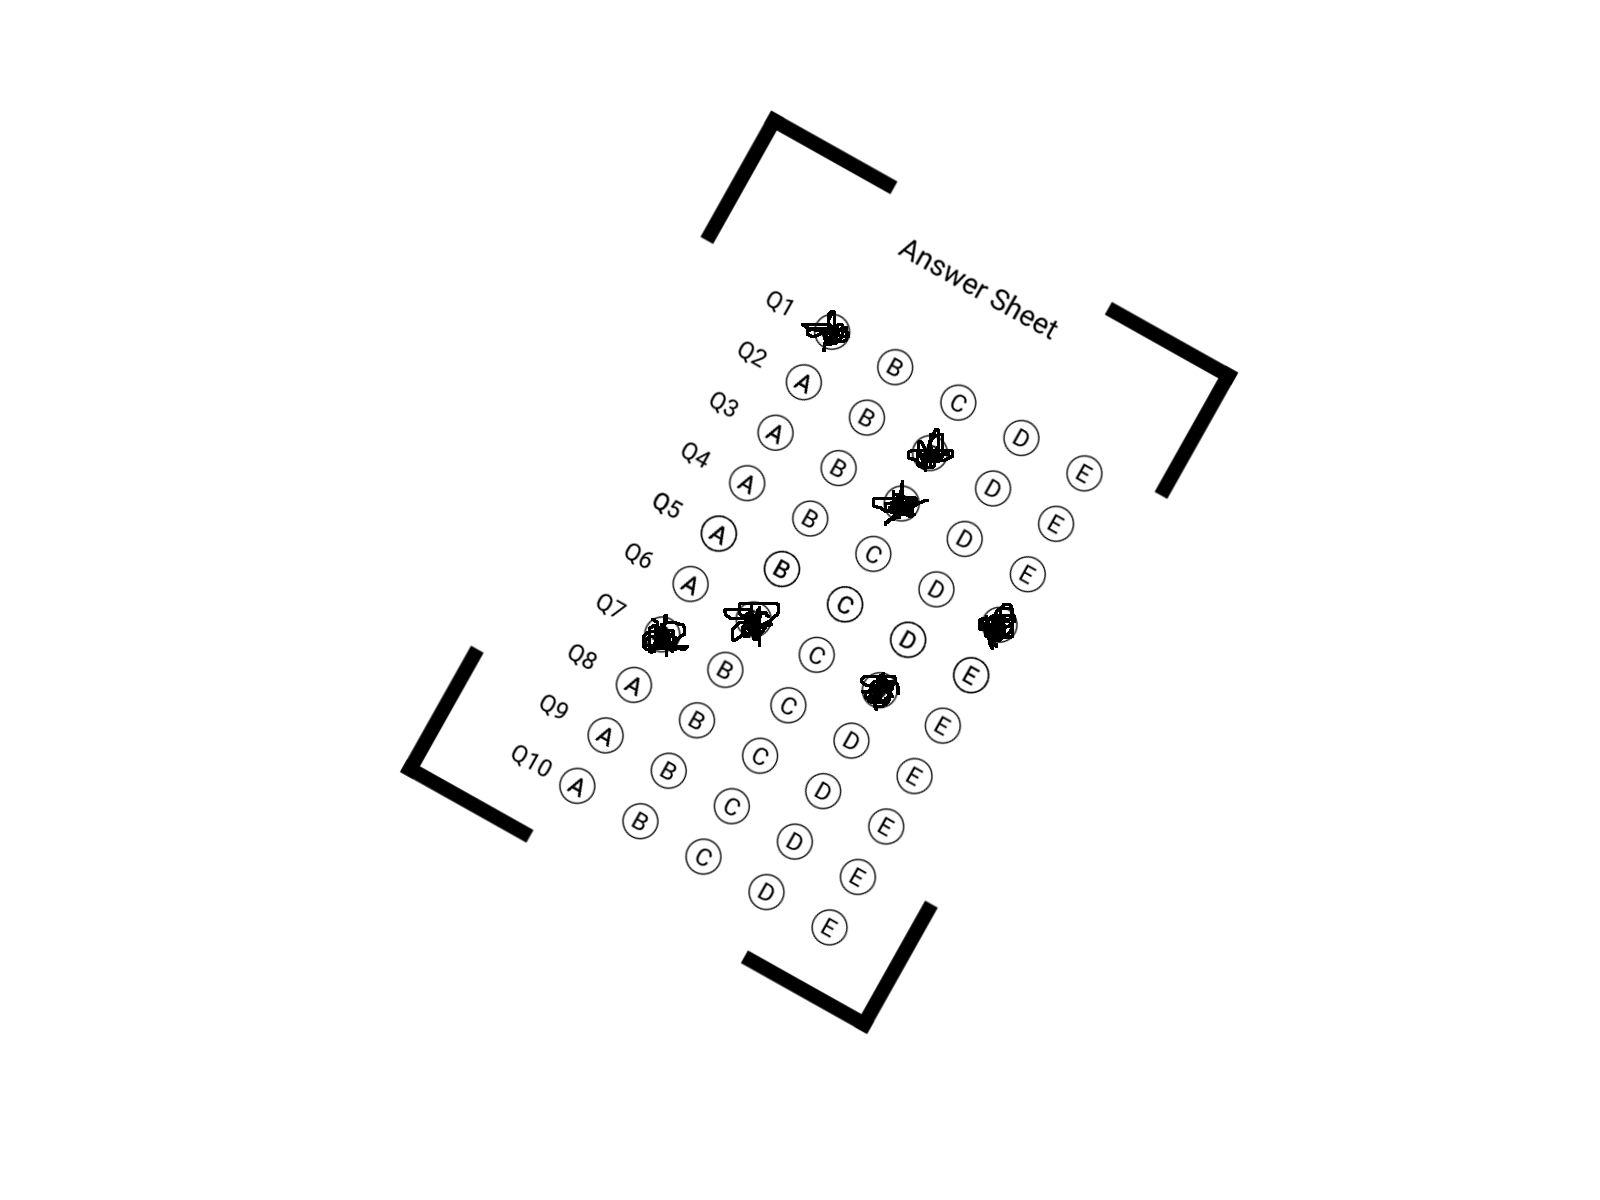

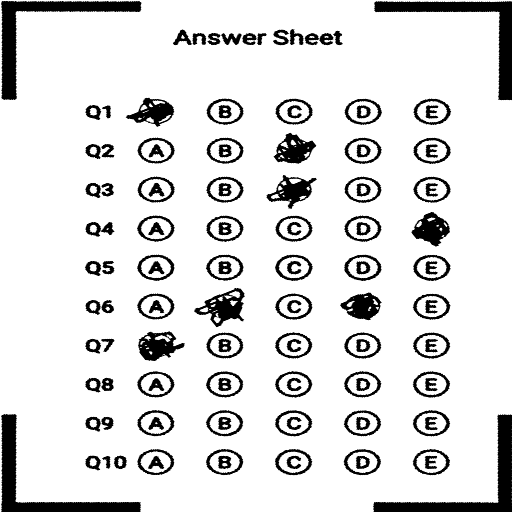

In [101]:
from preprocessing.preprocess import preprocess
from IPython.display import Image
import PIL.Image


image_path = "test/example_forms/form_from_omr/rotated-answeredsheet.png"
img = preprocess(image_path)

display(Image(image_path))

display(PIL.Image.fromarray(img))


In [86]:
import json

class FormStructureParser:
    """
    Gets imdata in cv2 image
    """
    def __init__(self, form_structure_json):
        self.FormStructure = self.load_form_structure(form_structure_json)

    def load_form_structure(self, form_structure_json):
        return json.loads(form_structure_json)

    def process_form (self, form_img):
        for field in self.FormStructure["fields"]:
            self.process_field(field, form_img)

    def process_field(self, field_def, form):
        print(field_def["name"])
        boxCount = field_def["numberOfBoxes"]
        x = field_def["topLeft"]["x"]
        width = field_def["boxWidth"]*boxCount + field_def['spaceBetweenBoxes']*boxCount
        y = field_def["topLeft"]["y"]
        height = field_def["boxHeight"]

        print(f"x: {x}")
        print(f"width: {width}")
        print(f"y: {y}")
        print(f"height: {height}")

        return form[y:y+height, x:x+width]
    
    def processBoxes(self, field_def, field_img):
        for i in range(field_def["numberOfBoxes"]):
            box_img = field_img
        
        


In [87]:
with open("./formStructureExample.json","rb") as f:
    s = f.read ()
# form_structure_json = json.loads(s)
# form_structure_json


In [130]:
j_text = """
{
  "fields": [
    {
      "name": "Example",
      "type": "string",
      "topLeft": {
        "x": 135,
        "y": 94
      },
      "numberOfBoxes": 5,
      "boxWidth": 30,
      "boxHeight": 30,
      "spaceBetweenBoxes": 35,
      "orientation": "horizontal"
    },
    {
      "name": "Example2",
      "type": "boxes",
      "topLeft": {
        "x": 10,
        "y": 0
      },
      "numberOfBoxes": 5,
      "boxWidth": 20,
      "boxHeight": 100,
      "spaceBetweenBoxes": 1,
      "orientation": "vertical"
    }
  ],
  "size": {
    "width": 740,
    "height": 1049
  }
}

"""

In [131]:
json.loads(j_text)

{'fields': [{'name': 'Example',
   'type': 'string',
   'topLeft': {'x': 135, 'y': 94},
   'numberOfBoxes': 5,
   'boxWidth': 30,
   'boxHeight': 30,
   'spaceBetweenBoxes': 35,
   'orientation': 'horizontal'},
  {'name': 'Example2',
   'type': 'boxes',
   'topLeft': {'x': 10, 'y': 0},
   'numberOfBoxes': 5,
   'boxWidth': 20,
   'boxHeight': 100,
   'spaceBetweenBoxes': 1,
   'orientation': 'vertical'}],
 'size': {'width': 740, 'height': 1049}}

In [132]:
fsp = FormStructureParser(j_text)

In [133]:
fieldROI = fsp.process_field(fsp.FormStructure['fields'][0],img)

Example
x: 135
width: 325
y: 94
height: 30


In [134]:
fieldROI

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 88,   0,   0, ..., 255, 255, 255],
       [255, 102,  45, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

<IPython.core.display.Javascript object>


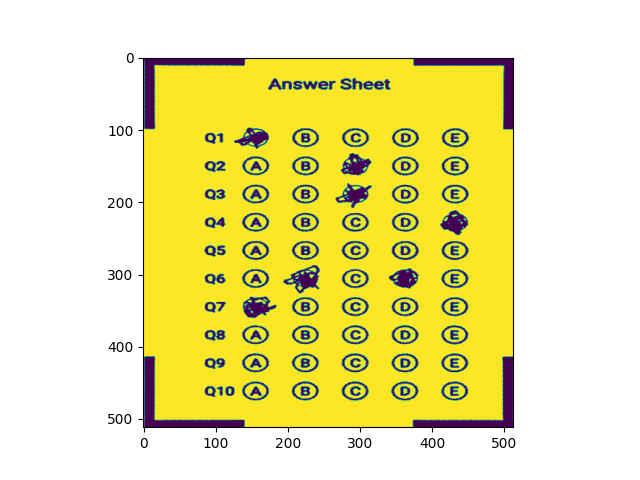

In [135]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [137]:
display(PIL.Image.fromarray(fieldROI))